In [1]:
import ast
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("game_data.csv", index_col=0)

In [3]:
res_rep = {"패":"Loss", "무":"Draw", "승":"Win"}

In [4]:
data.Match_result = data.Match_result.replace(res_rep)

In [5]:
mres = data.Match_result.value_counts()

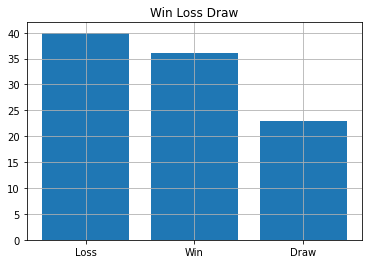

In [6]:
plt.bar(mres.index, mres.values)
plt.title("Win Loss Draw")
plt.grid()
plt.show()

최근 공식경기 100경기 중 오류가 있는 데이터 1건을 제외한 승률은 약 36% 임

In [7]:
Keyboard = data.loc[data.Controller == "keyboard"]

In [8]:
Gamepad = data.loc[data.Controller == "gamepad"]

### 컨트롤러별 승률

In [76]:
key_res = Keyboard.Match_result.value_counts(normalize=True)

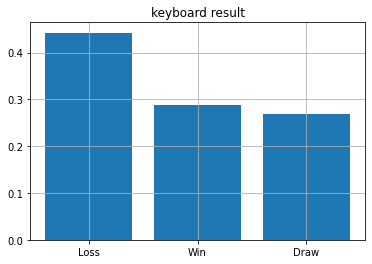

In [77]:
plt.title("keyboard result")
plt.bar(key_res.index, key_res.values)
plt.grid()
plt.show()

In [78]:
pad_res = Gamepad.Match_result.value_counts(normalize=True)

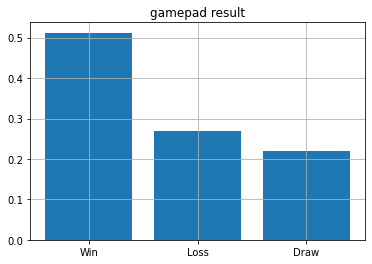

In [79]:
plt.title("gamepad result")
plt.bar(pad_res.index, pad_res.values)
plt.grid()
plt.show()

위의 그래프를 보았을 때 키보드로 플레이를 했을 경우에는 약 40% 이상의 패배율을 기록하였지만 패드로 플레이를 했을 경우에는 50% 이상의 승률을 기록하였습니다. 이를 통해 알 수 있는 사실은 제가 플레이 하는데 있어서 키보드보다 패드가 더 알맞기 것입니다.

### 게임패드 득점 분포 

In [12]:
gamepad_shoot = []
for sd in Gamepad.Shoot_detail:
    sd = ast.literal_eval(sd)
    for s in sd:
        gamepad_shoot.append(s)

In [13]:
keyboard_shoot = []
for sd in Keyboard.Shoot_detail:
    sd = ast.literal_eval(sd)
    for s in sd:
        keyboard_shoot.append(s)

In [14]:
shoot_x = []
shoot_y = []
shoot_res = []
shoot_type = []
assist_x = []
assist_y = []
in_penalty = []
hit_post = []

In [15]:
for s in gamepad_shoot:
    shoot_x.append(s["x"])
    shoot_y.append(s["y"])
    shoot_res.append(s["result"])
    shoot_type.append(s["type"])
    assist_x.append(s["assistX"])
    assist_y.append(s["assistY"])
    in_penalty.append(s["inPenalty"])
    hit_post.append(s["hitPost"])

In [16]:
shoot_dict = {"shoot_x":shoot_x, "shoot_y":shoot_y, "shoot_res":shoot_res,
              "shoot_type":shoot_type, "assist_x":assist_x, "assist_y":assist_y,
              "in_penalty":in_penalty, "hit_post":hit_post}

In [17]:
shoot_df = pd.DataFrame(shoot_dict)

In [18]:
shoot_res_rp = {1:"ontarget", 2:"offtarget", 3:"goal"}
shoot_type_rp = {1:"normal", 2:"finesse", 3:"header", 4:"lob", 5:"flare", 6:"low", 7:"volley",
                 8:"free-kick", 9:"penalty", 10:"knuckle"}
shoot_df.shoot_res = shoot_df.shoot_res.replace(shoot_res_rp)
shoot_df.shoot_type = shoot_df.shoot_type.replace(shoot_type_rp)

In [19]:
goal = shoot_df.loc[shoot_df.shoot_res == "goal"]
goal_type = goal.shoot_type.value_counts()

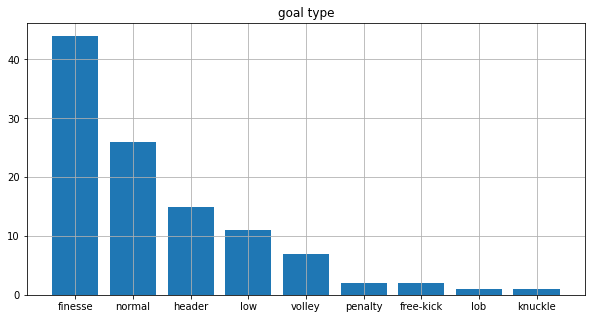

In [21]:
plt.figure(figsize=(10,5))
plt.bar(goal_type.index, goal_type.values)
plt.title("goal type")
plt.grid()
plt.show()

게임패드로 기록한 총 109 골 중 가장 많은 골을 기록한 것은 finesse 슛이고 총 44 골을 기록함. 그 다음으로는 일반 슛팅 헤더 순으로 많은 골을 넣었음

### 키보드 득점 분포 

In [41]:
keyboard_shoot = []
for sd in Keyboard.Shoot_detail:
    sd = ast.literal_eval(sd)
    for s in sd:
        keyboard_shoot.append(s)

In [42]:
shoot_x = []
shoot_y = []
shoot_res = []
shoot_type = []
assist_x = []
assist_y = []
in_penalty = []
hit_post = []

In [49]:
for s in keyboard_shoot:
    shoot_x.append(s["x"])
    shoot_y.append(s["y"])
    shoot_res.append(s["result"])
    shoot_type.append(s["type"])
    assist_x.append(s["assistX"])
    assist_y.append(s["assistY"])
    in_penalty.append(s["inPenalty"])
    hit_post.append(s["hitPost"])

In [50]:
shoot_dict = {"shoot_x":shoot_x, "shoot_y":shoot_y, "shoot_res":shoot_res,
              "shoot_type":shoot_type, "assist_x":assist_x, "assist_y":assist_y,
              "in_penalty":in_penalty, "hit_post":hit_post}

In [51]:
shoot_df = pd.DataFrame(shoot_dict)

In [52]:
shoot_df.shoot_res = shoot_df.shoot_res.replace(shoot_res_rp)
shoot_df.shoot_type = shoot_df.shoot_type.replace(shoot_type_rp)

In [53]:
goal = shoot_df.loc[shoot_df.shoot_res == "goal"]
goal_type = goal.shoot_type.value_counts()

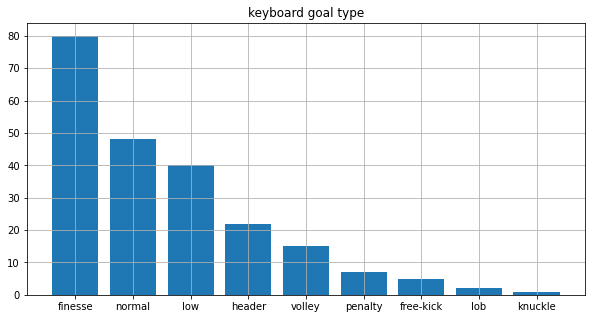

In [54]:
plt.figure(figsize=(10,5))
plt.bar(goal_type.index, goal_type.values)
plt.title("keyboard goal type")
plt.grid()
plt.show()

키보드로 플레이를 했을 경우에도 마찬가지로 finesse 슛을 통해 가장 많은 득점을 하였습니다. 뒤를 이어서 일반 슛과 패드와는 다르게 낮은 슛을 활용하여 많은 득점을 기록하였습니다.

### 게임패드 실점 분포

In [26]:
op_gamepad_shoot = []
for sd in Gamepad.OP_Shoot_detail:
    sd = ast.literal_eval(sd)
    for s in sd:
        op_gamepad_shoot.append(s)

In [28]:
op_shoot_x = []
op_shoot_y = []
op_shoot_res = []
op_shoot_type = []
op_assist_x = []
op_assist_y = []
op_in_penalty = []
op_hit_post = []

In [34]:
for s in op_gamepad_shoot:
    op_shoot_x.append(s["x"])
    op_shoot_y.append(s["y"])
    op_shoot_res.append(s["result"])
    op_shoot_type.append(s["type"])
    op_assist_x.append(s["assistX"])
    op_assist_y.append(s["assistY"])
    op_in_penalty.append(s["inPenalty"])
    op_hit_post.append(s["hitPost"])

In [35]:
op_shoot_dict = {"shoot_x":op_shoot_x, "shoot_y":op_shoot_y, "shoot_res":op_shoot_res,
              "shoot_type":op_shoot_type, "assist_x":op_assist_x, "assist_y":op_assist_y,
              "in_penalty":op_in_penalty, "hit_post":op_hit_post}

In [36]:
op_shoot_df = pd.DataFrame(op_shoot_dict)
op_shoot_df.shoot_res = op_shoot_df.shoot_res.replace(shoot_res_rp)
op_shoot_df.shoot_type = op_shoot_df.shoot_type.replace(shoot_type_rp)

In [37]:
op_goal = op_shoot_df.loc[op_shoot_df.shoot_res == "goal"]
op_goal_type = op_goal.shoot_type.value_counts()

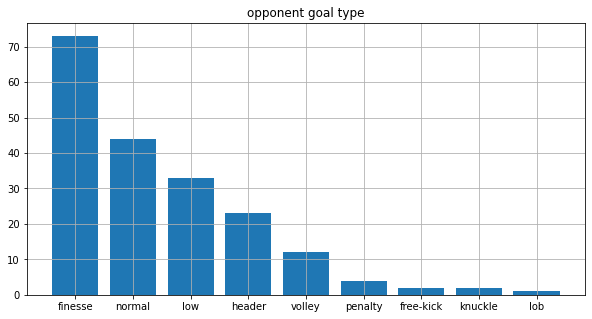

In [38]:
plt.figure(figsize=(10,5))
plt.bar(op_goal_type.index, op_goal_type.values)
plt.title("opponent goal type")
plt.grid()
plt.show()

실점은 마찬가지로 finesse 슛이 약 70골 이상으로 많은 골을 실점하였음. 그 다음으로는 일반 슛 그리고 낮은 슛 순으로 많은 골을 실점함
이를 바탕으로 패드로 플레이를 했을 때 finesse 슛에 취약하다는 점을 알 수 있음

### 키보드 실점 분포

In [55]:
op_keyboard_shoot = []
for sd in Keyboard.OP_Shoot_detail:
    sd = ast.literal_eval(sd)
    for s in sd:
        op_keyboard_shoot.append(s)

In [56]:
op_shoot_x = []
op_shoot_y = []
op_shoot_res = []
op_shoot_type = []
op_assist_x = []
op_assist_y = []
op_in_penalty = []
op_hit_post = []

In [57]:
for s in op_keyboard_shoot:
    op_shoot_x.append(s["x"])
    op_shoot_y.append(s["y"])
    op_shoot_res.append(s["result"])
    op_shoot_type.append(s["type"])
    op_assist_x.append(s["assistX"])
    op_assist_y.append(s["assistY"])
    op_in_penalty.append(s["inPenalty"])
    op_hit_post.append(s["hitPost"])

In [58]:
op_shoot_dict = {"shoot_x":op_shoot_x, "shoot_y":op_shoot_y, "shoot_res":op_shoot_res,
              "shoot_type":op_shoot_type, "assist_x":op_assist_x, "assist_y":op_assist_y,
              "in_penalty":op_in_penalty, "hit_post":op_hit_post}

In [59]:
op_shoot_df = pd.DataFrame(op_shoot_dict)
op_shoot_df.shoot_res = op_shoot_df.shoot_res.replace(shoot_res_rp)
op_shoot_df.shoot_type = op_shoot_df.shoot_type.replace(shoot_type_rp)

In [60]:
op_goal = op_shoot_df.loc[op_shoot_df.shoot_res == "goal"]
op_goal_type = op_goal.shoot_type.value_counts()

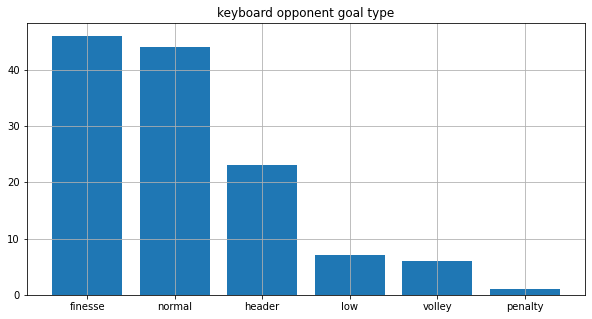

In [61]:
plt.figure(figsize=(10,5))
plt.bar(op_goal_type.index, op_goal_type.values)
plt.title("keyboard opponent goal type")
plt.grid()
plt.show()

키보드를 사용했을 경우에도 마찬가지로 finesse 슛으로 가장 많은 실점 하였고 그와 비슷하게 일반 슛으로 실점하였습니다. 그 다음은 패드와는 다르게 헤더로 많은 실점을 기록하였습니다. 

위의 지표들을 기준으로 알 수 있는 사실은 컨트롤러와 상관없이 득점과 실점 모두 finesse 슛을 통한 기록이 많았습니다. 이를 통해 제가 플레이한 최근 99경기 동안은 finesse 슛이 가장 효율적은 공격루트라고 추론할 수 있습니다.